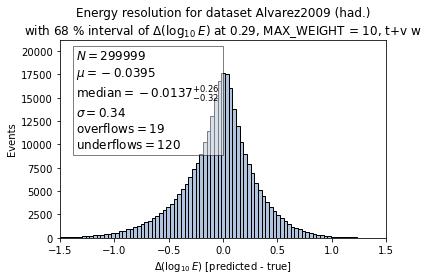

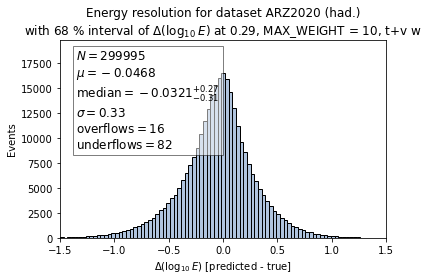

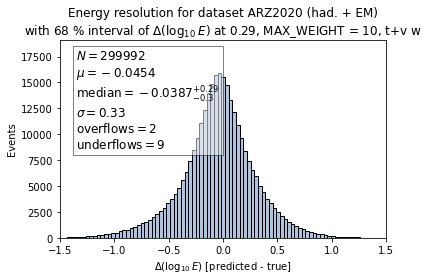

In [2]:
from matplotlib import pyplot as plt
from toolbox import get_histogram2d, get_pred_energy_diff_data, calculate_percentage_interval
from radiotools import plthelpers as php
import numpy as np

for run_id in ["E22.1", "E23.1", "E24.1"]:

    # Save the run name
    run_name = f"run{run_id}"

    # Constants
    plot_title = f"HISTOGRAM {run_name}"

    # %%
    energy_difference_data, shower_energy_log10_predict, shower_energy_log10 = get_pred_energy_diff_data(run_name, True)

    # Redefine N
    N = energy_difference_data.size

    # Calculate 68 %
    energy_68 = calculate_percentage_interval(energy_difference_data, 0.68)

    delta_log_E_string = r"$\Delta(\log_{10}\:E)$"
    # fig, ax = php.get_histogram(predicted_nu_energy[:, 0], bins=np.arange(17, 20.1, 0.05), xlabel="predicted energy")
    fig, ax = php.get_histogram(energy_difference_data, bins=np.linspace(-1.5, 1.5, 90),
                                xlabel=f"{delta_log_E_string} [predicted - true]", ylabel="Events",
                                kwargs={'color':"lightsteelblue", 'ec':"k"})
    # ax.plot(xl, N*stats.rayleigh(scale=scale, loc=loc).pdf(xl))


    if run_id == "E22.1": 
        plot_title = f"Energy resolution for dataset Alvarez2009 (had.)\nwith 68 % interval of {delta_log_E_string} at {energy_68:.2f}, MAX_WEIGHT = 10, t+v w"
    elif run_id == "E23.1": 
        plot_title = f"Energy resolution for dataset ARZ2020 (had.)\nwith 68 % interval of {delta_log_E_string} at {energy_68:.2f}, MAX_WEIGHT = 10, t+v w"
    elif run_id == "E24.1": 
        plot_title = f"Energy resolution for dataset ARZ2020 (had. + EM)\nwith 68 % interval of {delta_log_E_string} at {energy_68:.2f}, MAX_WEIGHT = 10, t+v w"

    
    plt.title(plot_title)
    plt.tight_layout()
    fig.savefig(f"plots/energy_resolution_{run_name}.png", dpi=300)